In [79]:
# Importing Libraries
       
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [80]:
#Loading Dataset
train = pd.read_csv("Telecom Churn.csv")
test = pd.read_csv("Telecom Churn.csv")

In [81]:
train.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [83]:
#Droping phone.number because it won't have any effect
train = train.drop('phone number',axis=1)
test = test.drop('phone number',axis=1)

In [84]:
#All continous variables in cname
cont_name = train.columns[(train.dtypes=="float64")|(train.dtypes=="int64")].tolist()
print(cont_name)

['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


In [85]:
#All categorical var in cat_names and removing target var
cat_names = train.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('churn')
cat_names

['state', 'international plan', 'voice mail plan']

In [86]:
train['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [87]:
#Checking missing values in train dataset
print(train.isnull().sum())  

#no missing value present in the train data

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [88]:
#Checking missing values in test data set
print(test.isnull().sum())  

#no missing value present in the test data

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


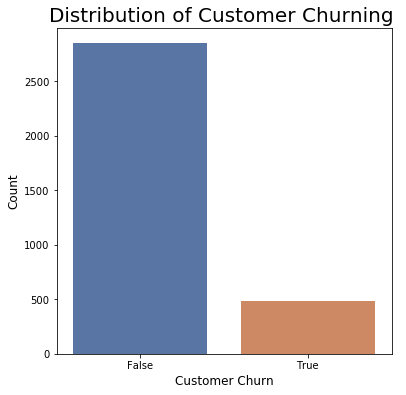

In [89]:
#Target Variable data distribution
plt.figure(figsize=(6,6))
sns.countplot(x=train.churn,palette='deep')
plt.xlabel('Customer Churn',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title("Distribution of Customer Churning ",fontsize= 20)
plt.show()

In [90]:
#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):
    
    train.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

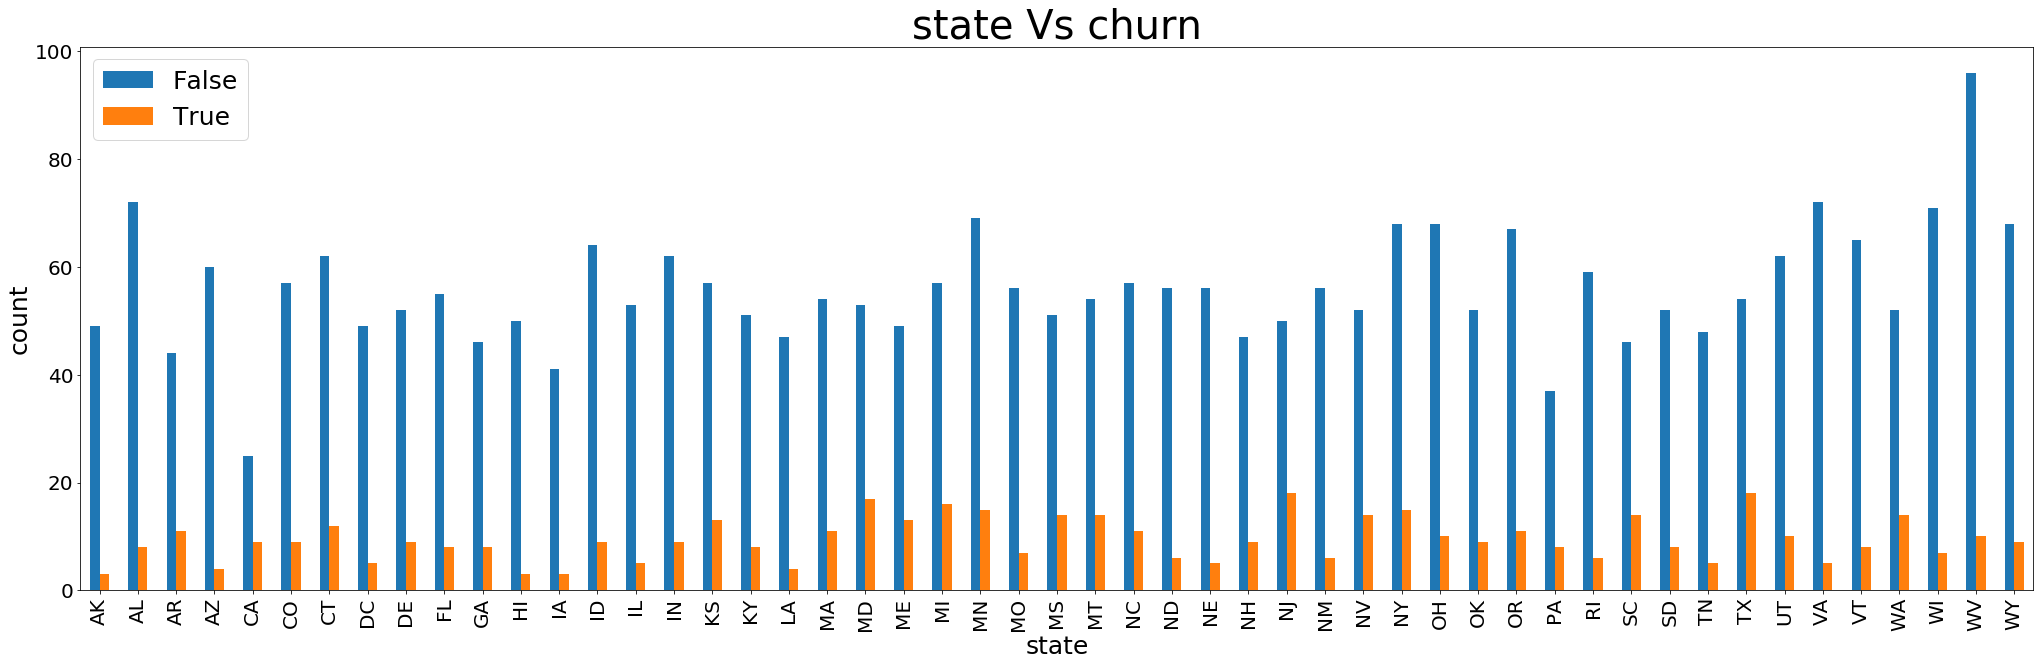

In [91]:
#State Wise Churning of customer
diff_bar('state','churn')

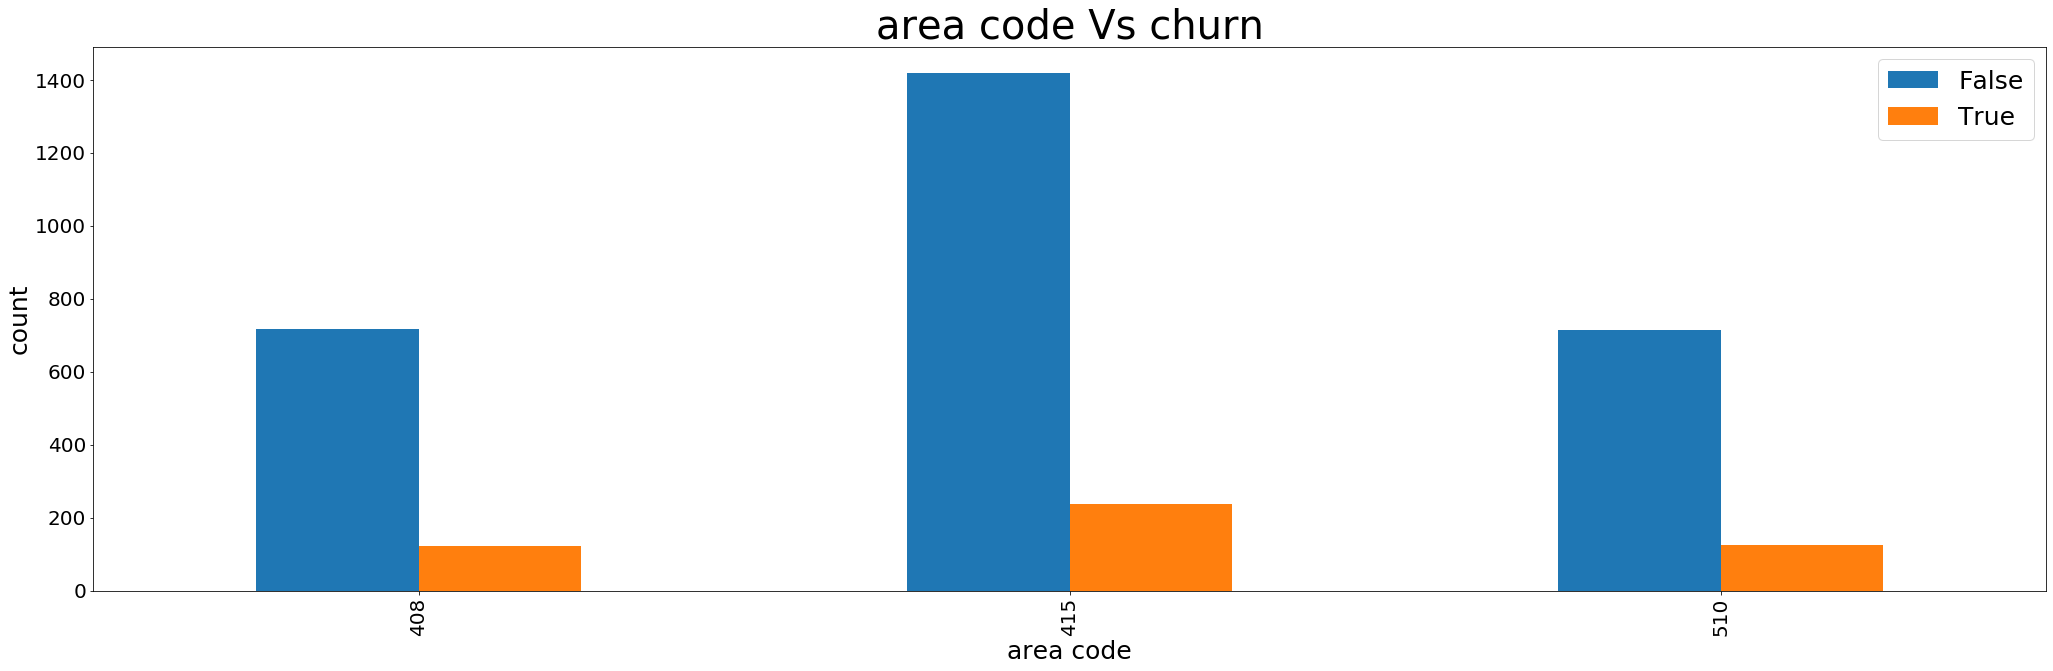

In [92]:
#area_code Wise Churning of customer
diff_bar('area code','churn')

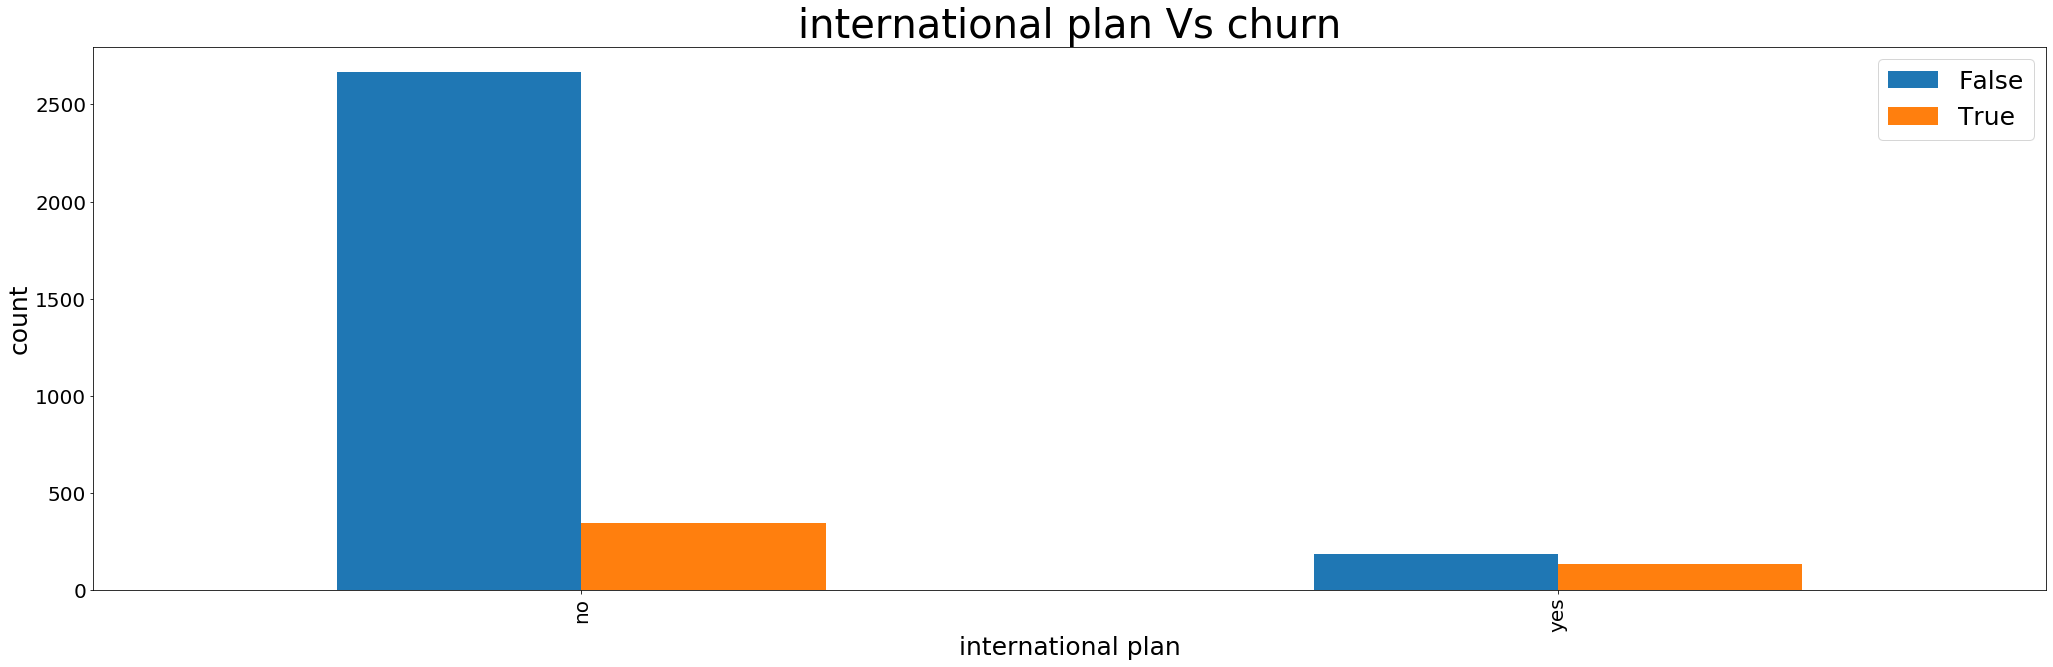

In [93]:
#International_Plan Wise Churning of customer
diff_bar('international plan','churn')

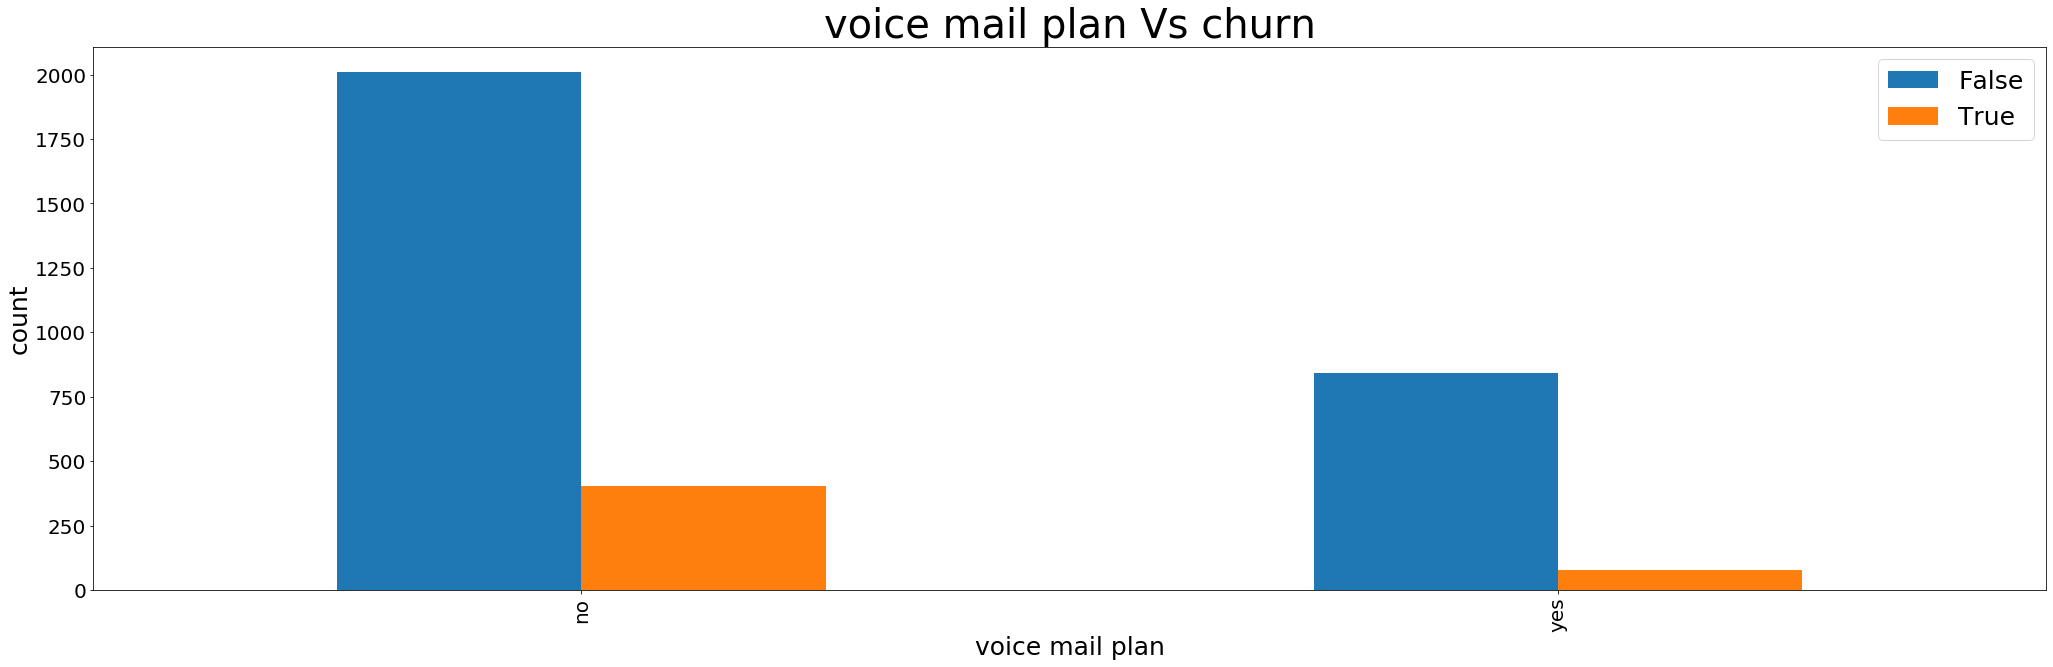

In [94]:
#No. of Customer Churning and had a Voice mail plan
diff_bar('voice mail plan','churn')

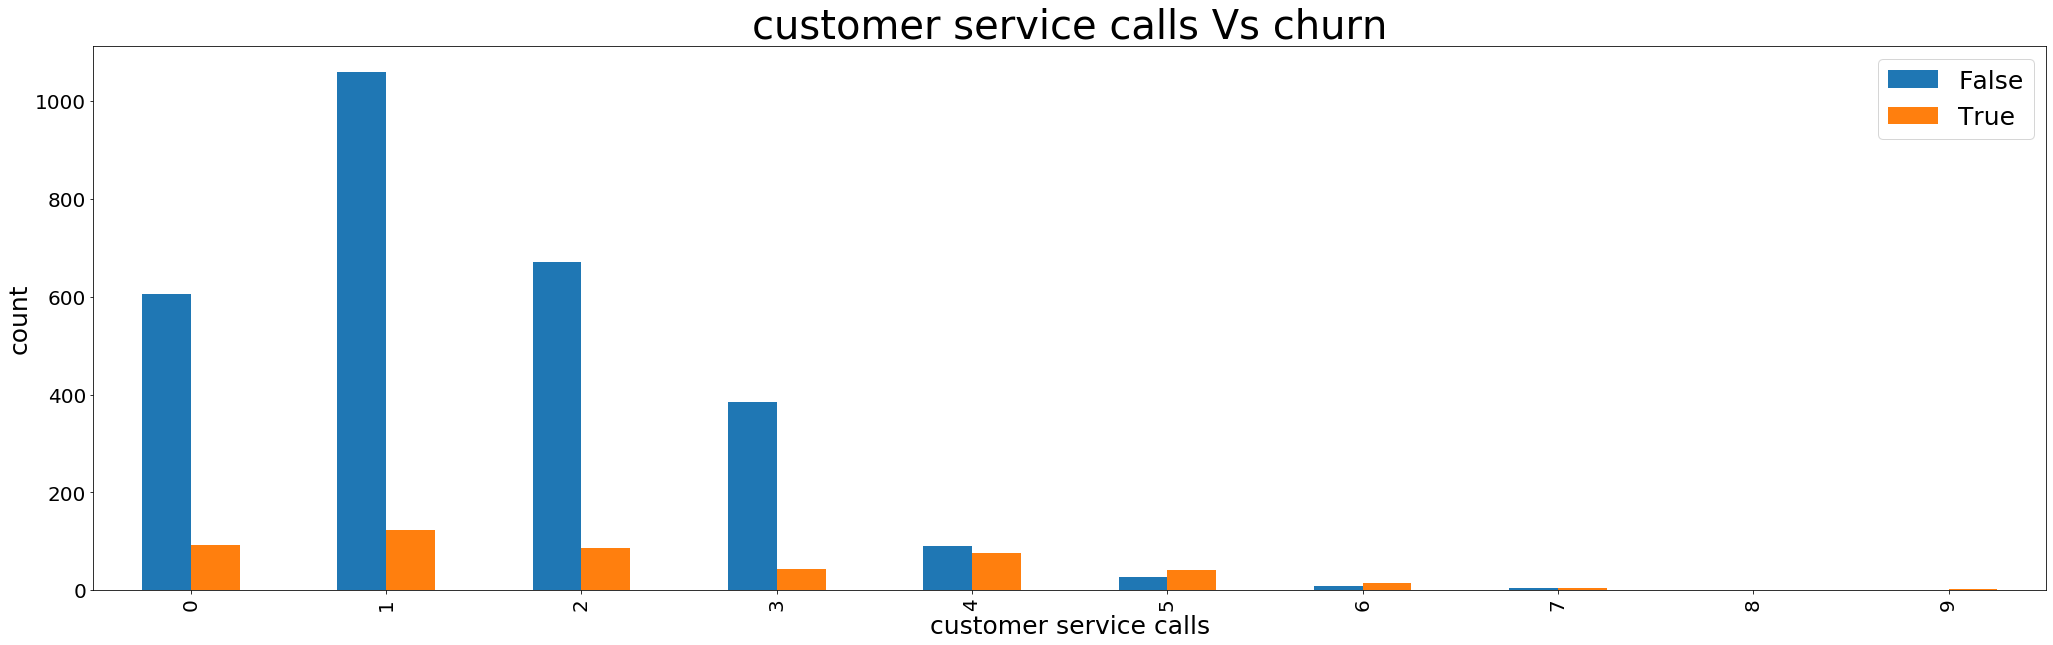

In [95]:
#Number of Customer_Service Call Wise Churning of customer
diff_bar('customer service calls','churn')

In [96]:
#Scatter plot function
def diff_scattr(x,y):
    fig=plt.figure()
    fig=sns.lmplot(x,y,data=train,fit_reg=False)
    plt.xlabel(x,fontsize=14)
    plt.ylabel(y,fontsize=14)
    plt.title("{X} and {Y} Scatter Plot".format(X=x,Y=y),fontsize = 16)
    plt.show()

<Figure size 432x288 with 0 Axes>

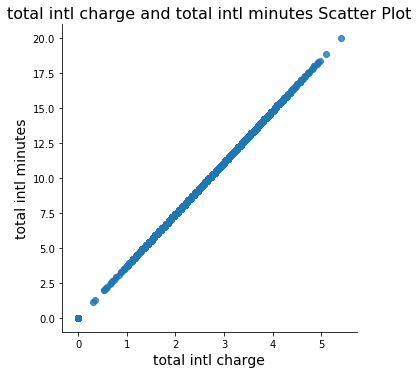

In [97]:
#Total intl charge and Total intl Minute
diff_scattr('total intl charge','total intl minutes')

<Figure size 432x288 with 0 Axes>

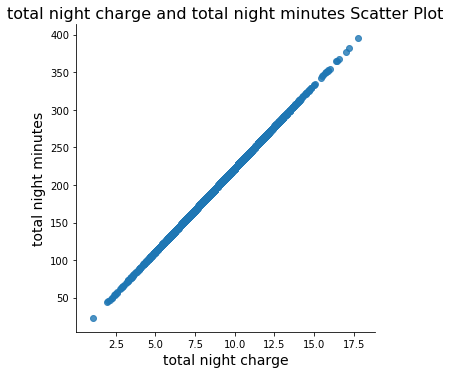

In [98]:
# Total night charge and Total night Minute
diff_scattr('total night charge','total night minutes')

<Figure size 432x288 with 0 Axes>

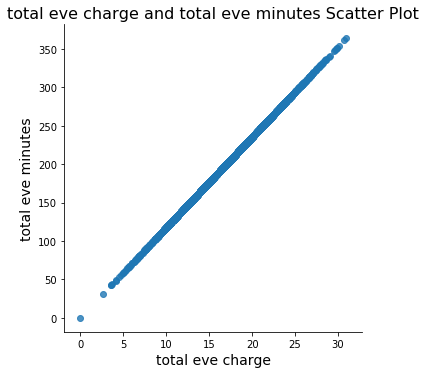

In [99]:
#Total eve charge and Total eve Minute
diff_scattr('total eve charge','total eve minutes')

<Figure size 432x288 with 0 Axes>

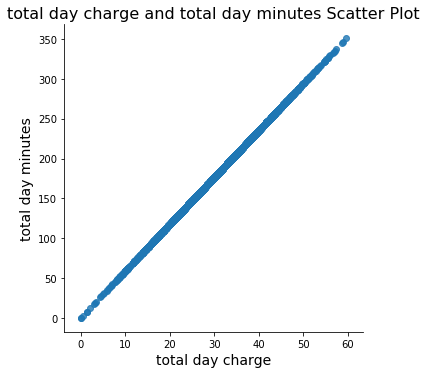

In [100]:
#Total day charge and Total Day Minute
diff_scattr('total day charge','total day minutes')

In [101]:
#function for converting categoric to num codes for plotting box plot
def cat_to_num(data):
    for i in range(0, data.shape[1]):
        #print(i)
        if(data.iloc[:,i].dtypes == 'object'):
            data.iloc[:,i] = pd.Categorical(data.iloc[:,i])
            data.iloc[:,i] = data.iloc[:,i].cat.codes
            data.iloc[:,i] = data.iloc[:,i].astype('object')
    return data

In [102]:
train = cat_to_num(train)
test = cat_to_num(test)

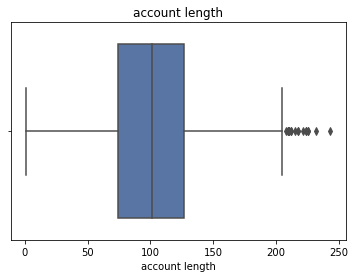

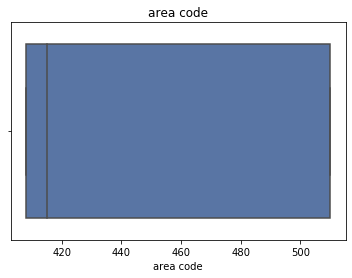

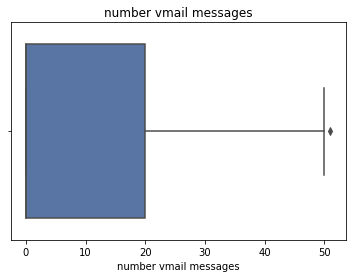

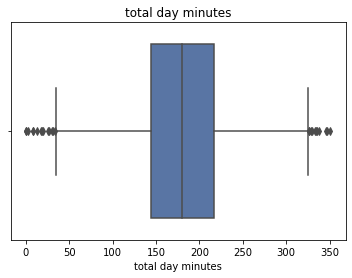

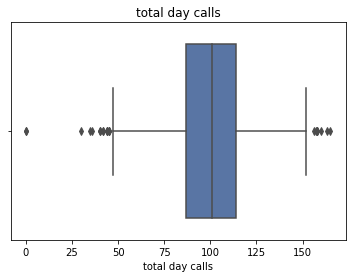

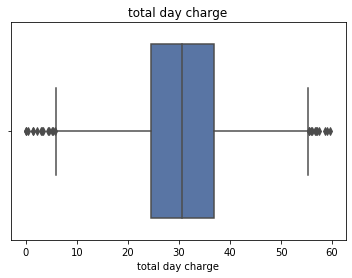

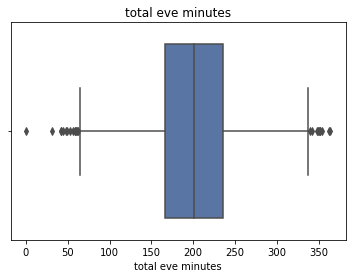

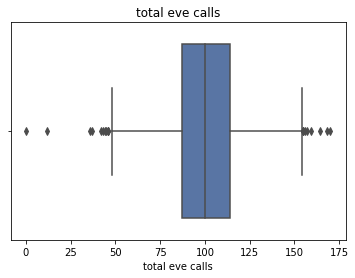

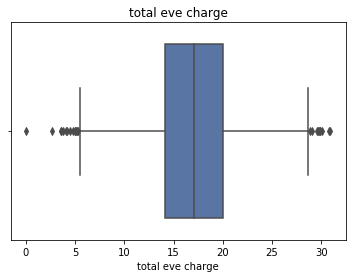

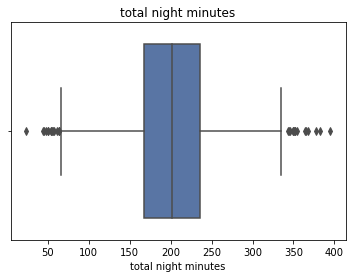

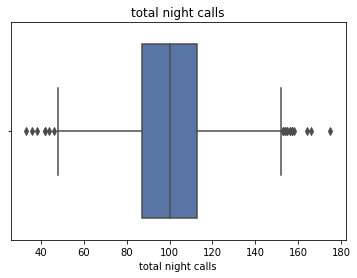

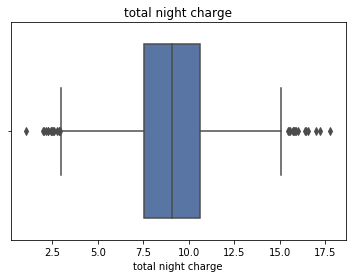

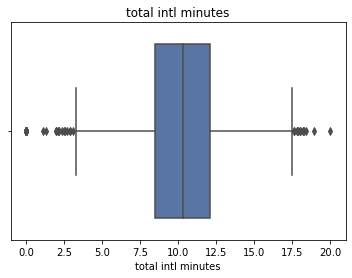

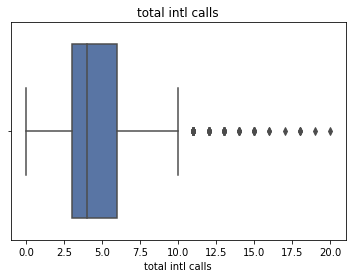

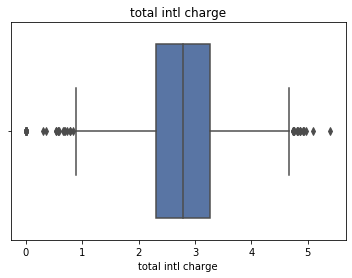

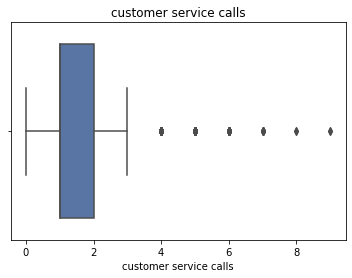

In [103]:
#Plotting Box Plot
for i in cont_name:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(train[i],palette="deep")
    plt.title(i)
    plt.show()

In [104]:
#Treating Out Liers and Converting them to nan
for i in cont_name:
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
    train.loc[train.loc[:,i] < minn,i] = np.nan
    train.loc[train.loc[:,i] > maxx,i] = np.nan
    print('{var} -----> {X}   Missing'.format(var = i, X = (train.loc[:,i].isnull().sum())))

account length -----> 18   Missing
area code -----> 0   Missing
number vmail messages -----> 1   Missing
total day minutes -----> 25   Missing
total day calls -----> 23   Missing
total day charge -----> 25   Missing
total eve minutes -----> 24   Missing
total eve calls -----> 20   Missing
total eve charge -----> 24   Missing
total night minutes -----> 30   Missing
total night calls -----> 22   Missing
total night charge -----> 30   Missing
total intl minutes -----> 46   Missing
total intl calls -----> 78   Missing
total intl charge -----> 49   Missing
customer service calls -----> 267   Missing


In [105]:
# Replacing all the nan values with the average of that column
for i in cont_name:
    train = train.apply(lambda x:x.fillna(train.loc[:,i].mean()))

In [106]:
train.head(5)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128.0,415.0,0,1,25.0,265.1,110.0,45.07,197.400000,99.0,16.780000,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,35,107.0,415.0,0,1,26.0,161.6,123.0,27.47,195.500000,103.0,16.620000,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,31,137.0,415.0,0,0,0.0,243.4,114.0,41.38,121.200000,110.0,10.300000,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False
3,35,84.0,408.0,1,0,0.0,299.4,71.0,50.90,100.430468,88.0,100.430468,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,36,75.0,415.0,1,0,0.0,166.7,113.0,28.34,148.300000,122.0,12.610000,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False


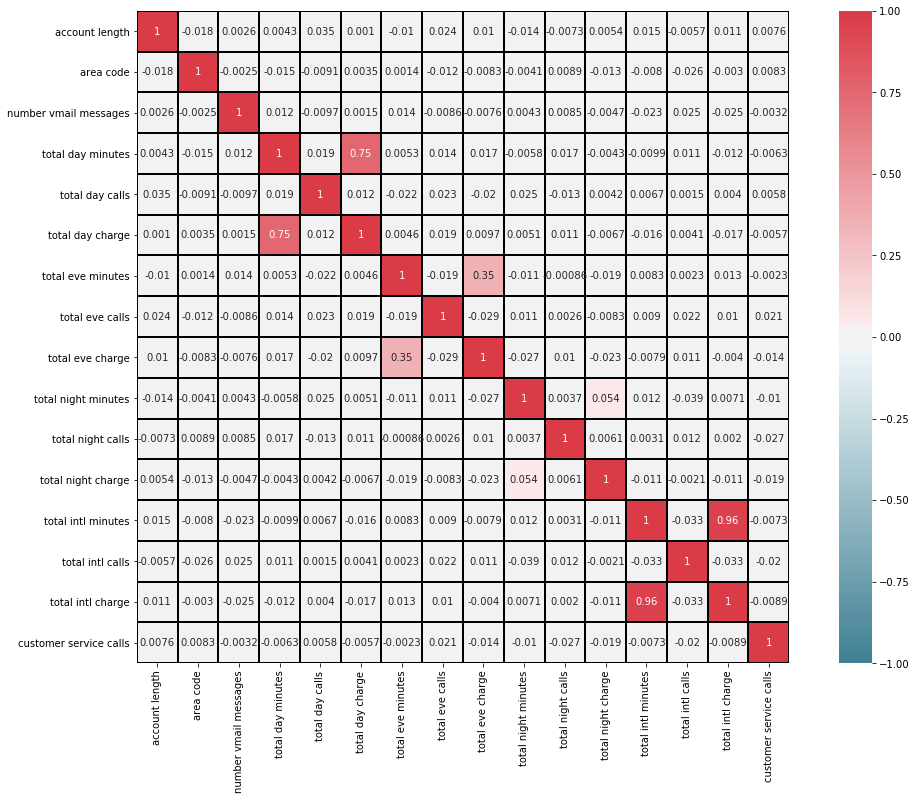

In [107]:
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(18,12))  #Width,height

#Generating Corelation Matrix
corr = train[cont_name].corr()

sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()

In [108]:
#checking Relation b/w categorical variables with respect to target var
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    #As we know imput to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(train['churn'],train[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)
    
#chi2 Actual chi square test value
#p = pvalue
#dof = degree of freedom
#ex = excepted value
# If p value is less than 0.05 then we will reject null hypothesis
#Null = both the variables are independent
#Alternate = Both the variables are not independent

state
0.002296221552011188
international plan
2.4931077033159556e-50
voice mail plan
5.15063965903898e-09


In [109]:
#Removing correlated variable & the variable which doesn't contain any meaningfull info
remv_col = ['state','total day charge','total eve charge','total night charge','total intl charge']
train = train.drop(remv_col,axis=1)
test = test.drop(remv_col,axis=1)

In [110]:
#Updating values _after removal of var
cont_name = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes',
         'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls',
         'customer service calls']
print(cont_name)

['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls', 'customer service calls']


In [111]:
#All categorical var and removing target var
cat_names = ['area code', 'international plan', 'voice mail plan']
print(cat_names)

['area code', 'international plan', 'voice mail plan']


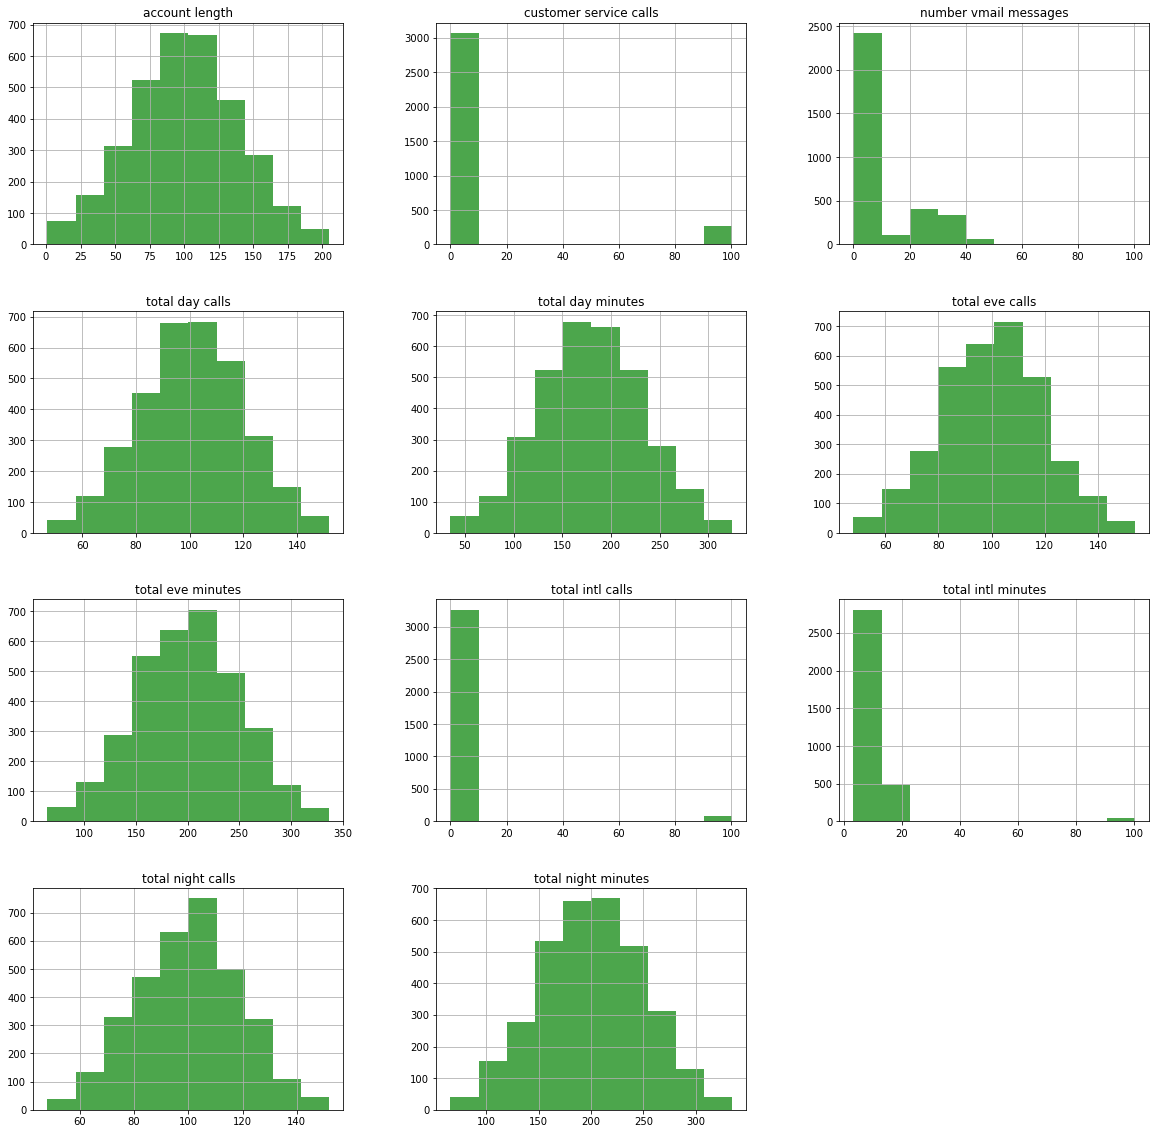

In [112]:
#Checking distribution of data via pandas visualization
train[cont_name].hist(figsize=(20,20),color='g',alpha = 0.7)
plt.show()

In [113]:
#Histogram breaks down by target variable
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of {var} breakdown by {Y}".format(var = x.name,Y=y.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.show()

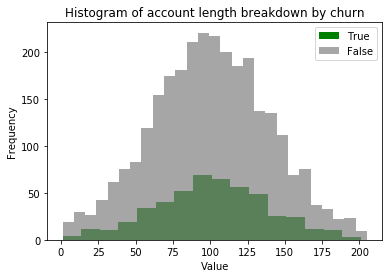

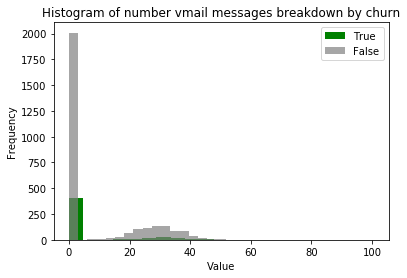

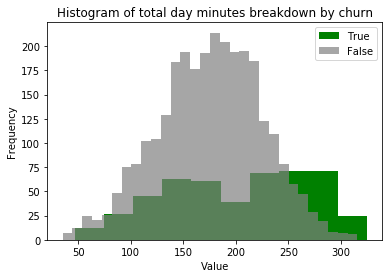

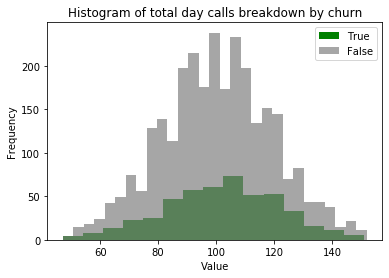

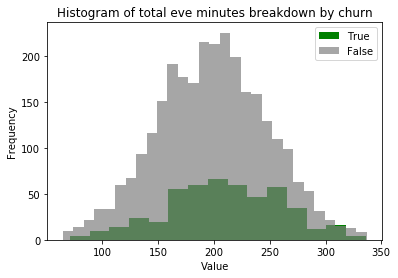

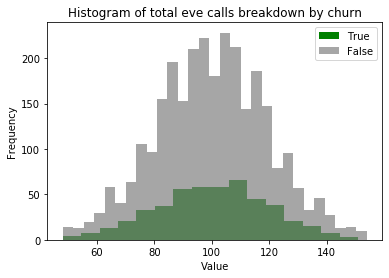

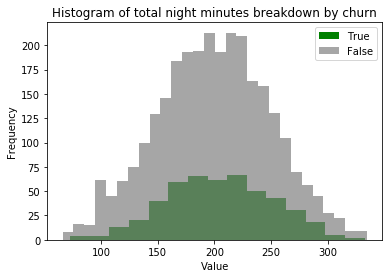

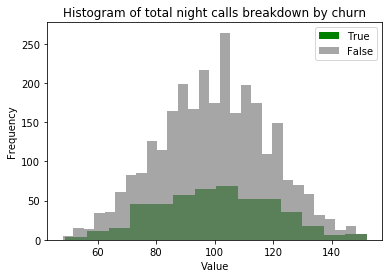

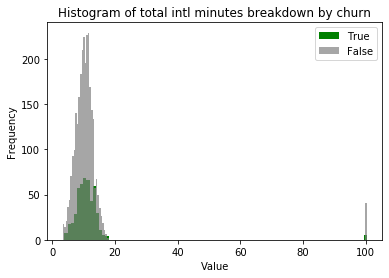

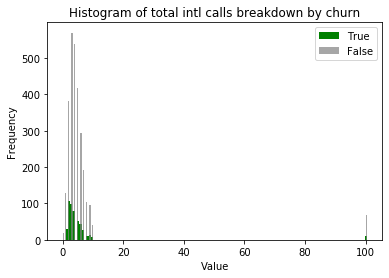

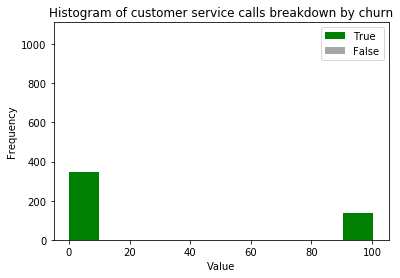

In [114]:
for i in cont_name:
    plot_hist_y(train[i],train.churn)

In [120]:
#Applying standarization as most of the variables are normalized distributed
def scale_standard(data):
    for i in cont_name:
        print(i)
        data[i] = (data[i] - data[i].mean())/data[i].std()
    return data 

In [122]:
#Standardizing Scale
train = scale_standard(train)
test = scale_standard(test)

account length
number vmail messages
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls
customer service calls
account length
number vmail messages
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls
customer service calls


In [123]:
train.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,0.709198,415.0,0,1,1.227063,1.614493,0.486477,-0.061297,-0.060385,0.907666,-0.472959,-0.141945,-0.240350,-0.306021,False
1,0.168995,415.0,0,1,1.299730,-0.334191,1.158303,-0.099474,0.146749,1.104287,0.159308,0.199671,-0.240350,-0.306021,False
2,0.940714,415.0,0,0,-0.589607,1.205928,0.693193,-1.592403,0.509234,-0.756514,0.211997,0.061178,-0.104152,-0.343155,False
3,-0.422657,408.0,1,0,-0.589607,2.260289,-1.528998,-2.009730,-0.630004,-0.061248,-0.578336,-0.455862,0.032046,-0.268888,False
4,-0.654173,415.0,1,0,-0.589607,-0.238169,0.641514,-1.047876,1.130637,-0.263949,1.107708,-0.132712,-0.240350,-0.231755,False


In [126]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

X = train.iloc[:,:14]
y = train.iloc[:,14]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


In [127]:
(X_train.shape),(y_train.shape)

((2233, 14), (2233,))

In [128]:
from imblearn.over_sampling import SMOTE

Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_sample(X_train,y_train)

In [129]:
(X_train_res.shape,y_train_res.shape)

((3790, 14), (3790,))

In [130]:

def pred(model_object,predictors,compare):
    predicted = model_object.predict(predictors)
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

In [131]:
# Random Forest
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(rf_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0    0    1
churn          
0      915   40
1       29  116

Classification paradox :------->>
Accuracy :-  93.73

Specificity //  True Negative Rate :-  95.81

Sensivity // True Positive Rate // Recall :-  80.0

False Negative Rate :-  20.0

False Postive Rate :-  4.19

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       955
           1       0.74      0.80      0.77       145

    accuracy                           0.94      1100
   macro avg       0.86      0.88      0.87      1100
weighted avg       0.94      0.94      0.94      1100



In [132]:
from sklearn.linear_model import LogisticRegression
#logistic without binaries
logit_model = LogisticRegression(random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(logit_model,X_test,y_test)


CONFUSION MATRIX ------->> 
col_0    0    1
churn          
0      767  188
1       24  121

Classification paradox :------->>
Accuracy :-  80.73

Specificity //  True Negative Rate :-  80.31

Sensivity // True Positive Rate // Recall :-  83.45

False Negative Rate :-  16.55

False Postive Rate :-  19.69

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       955
           1       0.39      0.83      0.53       145

    accuracy                           0.81      1100
   macro avg       0.68      0.82      0.71      1100
weighted avg       0.89      0.81      0.83      1100



In [133]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(KNN_Model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0    0    1
churn          
0      750  205
1       49   96

Classification paradox :------->>
Accuracy :-  76.91

Specificity //  True Negative Rate :-  78.53

Sensivity // True Positive Rate // Recall :-  66.21

False Negative Rate :-  33.79

False Postive Rate :-  21.47

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       955
           1       0.32      0.66      0.43       145

    accuracy                           0.77      1100
   macro avg       0.63      0.72      0.64      1100
weighted avg       0.86      0.77      0.80      1100



In [134]:
from sklearn.naive_bayes import GaussianNB
#Navie Model Development
Naive_model = GaussianNB().fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(Naive_model,X_test,y_test)


CONFUSION MATRIX ------->> 
col_0    0    1
churn          
0      580  375
1       22  123

Classification paradox :------->>
Accuracy :-  63.91

Specificity //  True Negative Rate :-  60.73

Sensivity // True Positive Rate // Recall :-  84.83

False Negative Rate :-  15.17

False Postive Rate :-  39.27

              precision    recall  f1-score   support

           0       0.96      0.61      0.75       955
           1       0.25      0.85      0.38       145

    accuracy                           0.64      1100
   macro avg       0.61      0.73      0.56      1100
weighted avg       0.87      0.64      0.70      1100



# Final Model :- Random Forest
As above random forest fits best for out dataset out of our tested models

In [135]:
# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

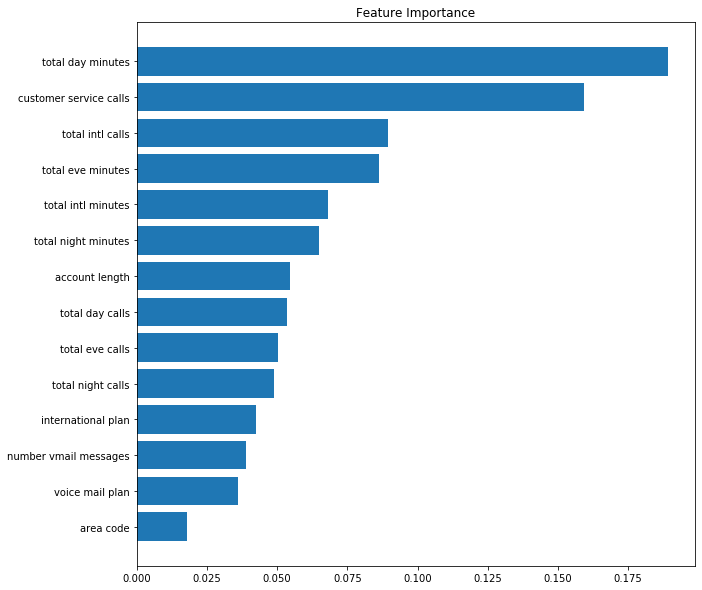

In [136]:
#Calculating feature importances
importances = final_Model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [train.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(X.shape[1]),importances[indices],align = 'center')
plt.yticks(range(X.shape[1]), names)
plt.show()

ROC AUC: 0.90


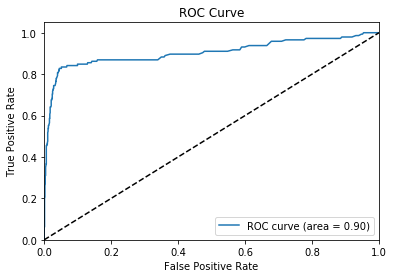

In [137]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, final_Model.predict_proba(X_test)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Final Test Data Predictions¶

In [138]:
#Test Data Spliting parts target and Predictors
XX = test.iloc[:,:14].values  #predictors
yy = test.iloc[:,14].values   #target
yy=yy.astype('int')

In [139]:
#Predicting test data 
#pred(model_object=final_Model,predictors=XX,compare=yy)

Churn_Pred = final_Model.predict(XX)
cm = pd.crosstab(yy,Churn_Pred)
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]
FP = cm.iloc[0,1]
print("CONFUSION MATRIX ----->> ")
print(cm)
print()
##check accuracy of model
print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

CONFUSION MATRIX ----->> 
col_0     0    1
row_0           
0      2447  403
1        63  420

Accuracy :-  86.02
False Negative Rate :-  13.04
False Postive Rate :-  14.14


In [140]:
print(classification_report(yy,Churn_Pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2850
           1       0.51      0.87      0.64       483

    accuracy                           0.86      3333
   macro avg       0.74      0.86      0.78      3333
weighted avg       0.91      0.86      0.87      3333



# AUC & ROC over Test Data

ROC AUC: 0.93


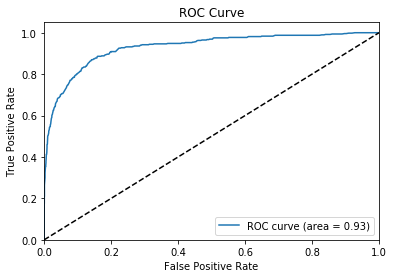

In [141]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(yy, final_Model.predict_proba(XX)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()